In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

from nba_api.stats.static import teams
 
from nba_api.stats.endpoints import leaguedashteamstats

In [17]:
teamsperformance = leaguedashteamstats.LeagueDashTeamStats(season='2020-21',per_mode_detailed="PerGame").get_data_frames()[0]
teamsperformance = teamsperformance.sort_values('TEAM_ID')
teamsperformance.drop(teamsperformance.columns.difference(["W_PCT",
            "FGM",
            "FGA",
            "FG_PCT",
            "FG3M",
            "FG3A",
            "FG3_PCT",
            "FTM",
            "FTA",
            "FT_PCT",
            "OREB",
            "DREB",
            "REB",
            "AST",
            "TOV",
            "STL",
            "BLK",
            "BLKA",
            "PF",
            "PFD",
            "PTS"]), 1, inplace=True)
teamsperformanceD = leaguedashteamstats.LeagueDashTeamStats(season='2020-21',per_mode_detailed="PerGame",measure_type_detailed_defense="Opponent").get_data_frames()[0]
teamsperformanceD = teamsperformanceD.sort_values('TEAM_ID')
teamsperformanceD.drop(teamsperformanceD.columns.difference([
            "OPP_FGM",
            "OPP_FGA",
            "OPP_FG_PCT",
            "OPP_FG3M",
            "OPP_FG3A",
            "OPP_FG3_PCT",
            "OPP_FTM",
            "OPP_FTA",
            "OPP_FT_PCT",
            "OPP_OREB",
            "OPP_DREB",
            "OPP_REB",
            "OPP_AST",
            "OPP_TOV",
            "OPP_STL",
            "OPP_BLK",
            "OPP_BLKA",
            "OPP_PF",
            "OPP_PFD",
            "OPP_PTS"]), 1, inplace=True)

teamsperformance = pd.concat([teamsperformance,teamsperformanceD],axis = 1)

In [18]:
teamsperformance2020 = leaguedashteamstats.LeagueDashTeamStats(season='2019-20',per_mode_detailed="PerGame").get_data_frames()[0]
teamsperformance2020 = teamsperformance2020.sort_values('TEAM_ID')
teamsperformance2020.drop(teamsperformance2020.columns.difference(["W_PCT",
            "FGM",
            "FGA",
            "FG_PCT",
            "FG3M",
            "FG3A",
            "FG3_PCT",
            "FTM",
            "FTA",
            "FT_PCT",
            "OREB",
            "DREB",
            "REB",
            "AST",
            "TOV",
            "STL",
            "BLK",
            "BLKA",
            "PF",
            "PFD",
            "PTS"]), 1, inplace=True)
teamsperformance2020D = leaguedashteamstats.LeagueDashTeamStats(season='2019-20',per_mode_detailed="PerGame",measure_type_detailed_defense="Opponent").get_data_frames()[0]
teamsperformance2020D = teamsperformance2020D.sort_values('TEAM_ID')
teamsperformance2020D.drop(teamsperformance2020D.columns.difference([
            "OPP_FGM",
            "OPP_FGA",
            "OPP_FG_PCT",
            "OPP_FG3M",
            "OPP_FG3A",
            "OPP_FG3_PCT",
            "OPP_FTM",
            "OPP_FTA",
            "OPP_FT_PCT",
            "OPP_OREB",
            "OPP_DREB",
            "OPP_REB",
            "OPP_AST",
            "OPP_TOV",
            "OPP_STL",
            "OPP_BLK",
            "OPP_BLKA",
            "OPP_PF",
            "OPP_PFD",
            "OPP_PTS"]), 1, inplace=True)

teamsperformance2020 = pd.concat([teamsperformance2020,teamsperformance2020D],axis = 1)
teamsperformance2020.head()

,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
0,0.299,40.6,90.6,0.449,12.0,36.1,0.333,18.5,23.4,0.790,...,35.9,47.0,25.0,15.0,9.0,6.4,5.1,21.0,23.1,119.7
1,0.667,41.3,89.6,0.461,12.6,34.5,0.364,18.6,23.2,0.801,...,34.0,44.3,22.4,15.2,7.1,5.5,5.6,20.7,21.6,107.3
5,0.292,40.3,87.9,0.458,11.2,31.8,0.351,15.1,19.9,0.758,...,33.1,42.9,26.1,13.0,9.4,6.3,3.2,19.6,18.3,114.8
18,0.417,42.6,91.6,0.465,13.6,36.9,0.370,17.1,23.4,0.729,...,34.7,44.8,24.5,14.5,8.5,4.8,5.0,21.1,21.2,117.1
4,0.338,39.6,88.6,0.447,12.2,35.1,0.348,15.5,20.5,0.755,...,35.4,45.5,25.4,18.3,8.2,5.9,4.1,19.2,21.8,109.9


In [19]:
teamsperformance2019 = leaguedashteamstats.LeagueDashTeamStats(season='2018-19',per_mode_detailed="PerGame").get_data_frames()[0]
teamsperformance2019 = teamsperformance2019.sort_values('TEAM_ID')
teamsperformance2019.drop(teamsperformance2019.columns.difference(["W_PCT",
            "FGM",
            "FGA",
            "FG_PCT",
            "FG3M",
            "FG3A",
            "FG3_PCT",
            "FTM",
            "FTA",
            "FT_PCT",
            "OREB",
            "DREB",
            "REB",
            "AST",
            "TOV",
            "STL",
            "BLK",
            "BLKA",
            "PF",
            "PFD",
            "PTS"]), 1, inplace=True)
teamsperformance2019D = leaguedashteamstats.LeagueDashTeamStats(season='2018-19',per_mode_detailed="PerGame",measure_type_detailed_defense="Opponent").get_data_frames()[0]
teamsperformance2019D = teamsperformance2019D.sort_values('TEAM_ID')
teamsperformance2019D.drop(teamsperformance2019D.columns.difference([
            "OPP_FGM",
            "OPP_FGA",
            "OPP_FG_PCT",
            "OPP_FG3M",
            "OPP_FG3A",
            "OPP_FG3_PCT",
            "OPP_FTM",
            "OPP_FTA",
            "OPP_FT_PCT",
            "OPP_OREB",
            "OPP_DREB",
            "OPP_REB",
            "OPP_AST",
            "OPP_TOV",
            "OPP_STL",
            "OPP_BLK",
            "OPP_BLKA",
            "OPP_PF",
            "OPP_PFD",
            "OPP_PTS"]), 1, inplace=True)

teamsperformance2019 = pd.concat([teamsperformance2019,teamsperformance2019D],axis = 1)
teamsperformance2019.head()

,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
0,0.354,41.4,91.8,0.451,13.0,37.0,0.352,17.6,23.4,0.752,...,35.4,46.0,26.9,15.0,9.9,5.5,5.1,22.2,23.6,119.4
1,0.598,42.1,90.5,0.465,12.6,34.5,0.365,15.6,19.5,0.802,...,35.5,45.9,23.7,15.1,6.8,3.9,5.3,19.5,20.4,108.0
5,0.232,38.9,87.6,0.444,10.3,29.1,0.355,16.4,20.7,0.792,...,34.6,44.1,25.7,12.5,6.9,5.6,2.4,19.4,20.0,114.1
18,0.402,43.7,92.2,0.473,10.3,29.9,0.344,17.8,23.4,0.761,...,34.8,45.8,26.5,13.6,8.6,5.4,5.4,21.0,21.1,116.8
4,0.268,39.8,87.9,0.453,9.1,25.9,0.351,16.2,20.7,0.783,...,36.4,46.4,25.5,13.3,7.3,5.8,4.3,18.7,20.3,113.4


In [20]:
teamsperformance2018 = leaguedashteamstats.LeagueDashTeamStats(season='2017-18',per_mode_detailed="PerGame").get_data_frames()[0]
teamsperformance2018 = teamsperformance2018.sort_values('TEAM_ID')
teamsperformance2018.drop(teamsperformance2018.columns.difference(["W_PCT",
            "FGM",
            "FGA",
            "FG_PCT",
            "FG3M",
            "FG3A",
            "FG3_PCT",
            "FTM",
            "FTA",
            "FT_PCT",
            "OREB",
            "DREB",
            "REB",
            "AST",
            "TOV",
            "STL",
            "BLK",
            "BLKA",
            "PF",
            "PFD",
            "PTS"]), 1, inplace=True)
teamsperformance2018D = leaguedashteamstats.LeagueDashTeamStats(season='2017-18',per_mode_detailed="PerGame",measure_type_detailed_defense="Opponent").get_data_frames()[0]
teamsperformance2018D = teamsperformance2018D.sort_values('TEAM_ID')
teamsperformance2018D.drop(teamsperformance2018D.columns.difference([
            "OPP_FGM",
            "OPP_FGA",
            "OPP_FG_PCT",
            "OPP_FG3M",
            "OPP_FG3A",
            "OPP_FG3_PCT",
            "OPP_FTM",
            "OPP_FTA",
            "OPP_FT_PCT",
            "OPP_OREB",
            "OPP_DREB",
            "OPP_REB",
            "OPP_AST",
            "OPP_TOV",
            "OPP_STL",
            "OPP_BLK",
            "OPP_BLKA",
            "OPP_PF",
            "OPP_PFD",
            "OPP_PTS"]), 1, inplace=True)

teamsperformance2018 = pd.concat([teamsperformance2018,teamsperformance2018D],axis = 1)

In [21]:
teamsperformance2017 = leaguedashteamstats.LeagueDashTeamStats(season='2016-17',per_mode_detailed="PerGame").get_data_frames()[0]
teamsperformance2017 = teamsperformance2017.sort_values('TEAM_ID')
teamsperformance2017.drop(teamsperformance2017.columns.difference(["W_PCT",
            "FGM",
            "FGA",
            "FG_PCT",
            "FG3M",
            "FG3A",
            "FG3_PCT",
            "FTM",
            "FTA",
            "FT_PCT",
            "OREB",
            "DREB",
            "REB",
            "AST",
            "TOV",
            "STL",
            "BLK",
            "BLKA",
            "PF",
            "PFD",
            "PTS"]), 1, inplace=True)
teamsperformance2017D = leaguedashteamstats.LeagueDashTeamStats(season='2016-17',per_mode_detailed="PerGame",measure_type_detailed_defense="Opponent").get_data_frames()[0]
teamsperformance2017D = teamsperformance2017D.sort_values('TEAM_ID')
teamsperformance2017D.drop(teamsperformance2017D.columns.difference([
            "OPP_FGM",
            "OPP_FGA",
            "OPP_FG_PCT",
            "OPP_FG3M",
            "OPP_FG3A",
            "OPP_FG3_PCT",
            "OPP_FTM",
            "OPP_FTA",
            "OPP_FT_PCT",
            "OPP_OREB",
            "OPP_DREB",
            "OPP_REB",
            "OPP_AST",
            "OPP_TOV",
            "OPP_STL",
            "OPP_BLK",
            "OPP_BLKA",
            "OPP_PF",
            "OPP_PFD",
            "OPP_PTS"]), 1, inplace=True)

teamsperformance2017 = pd.concat([teamsperformance2017,teamsperformance2017D],axis = 1)
teamsperformance2017.head()

,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
0,0.524,38.1,84.4,0.451,8.9,26.1,0.341,18.1,24.9,0.728,...,33.2,43.9,23.4,15.4,9.0,5.2,4.8,21.6,18.2,104.0
1,0.646,38.6,85.1,0.454,12.0,33.4,0.359,18.7,23.2,0.807,...,33.8,44.5,22.6,13.9,7.6,5.2,4.1,20.3,20.6,105.4
5,0.622,39.9,84.9,0.470,13.0,33.9,0.384,17.5,23.3,0.748,...,33.2,44.2,24.7,12.6,7.3,4.3,4.0,20.6,18.1,107.2
18,0.415,39.1,87.0,0.450,9.4,26.8,0.350,16.7,22.3,0.750,...,37.7,48.3,23.4,14.0,7.4,4.2,5.5,19.3,18.2,106.4
4,0.500,38.6,87.1,0.444,7.6,22.3,0.340,18.0,22.5,0.798,...,32.9,43.2,23.6,13.4,7.3,4.6,4.8,18.8,17.7,102.4


In [22]:
#merge the two dataframes

teamsperformance_test = pd.concat([teamsperformance2020,
                                   teamsperformance2019,teamsperformance2018,teamsperformance2017], ignore_index=True)

In [23]:
teamsperformance_test.head()

,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
0,0.299,40.6,90.6,0.449,12.0,36.1,0.333,18.5,23.4,0.790,...,35.9,47.0,25.0,15.0,9.0,6.4,5.1,21.0,23.1,119.7
1,0.667,41.3,89.6,0.461,12.6,34.5,0.364,18.6,23.2,0.801,...,34.0,44.3,22.4,15.2,7.1,5.5,5.6,20.7,21.6,107.3
2,0.292,40.3,87.9,0.458,11.2,31.8,0.351,15.1,19.9,0.758,...,33.1,42.9,26.1,13.0,9.4,6.3,3.2,19.6,18.3,114.8
3,0.417,42.6,91.6,0.465,13.6,36.9,0.370,17.1,23.4,0.729,...,34.7,44.8,24.5,14.5,8.5,4.8,5.0,21.1,21.2,117.1
4,0.338,39.6,88.6,0.447,12.2,35.1,0.348,15.5,20.5,0.755,...,35.4,45.5,25.4,18.3,8.2,5.9,4.1,19.2,21.8,109.9


In [24]:
teamsperformance_test.isnull().values.any()

False

In [27]:
teamsperformance = teamsperformance[teamsperformance['W_PCT'] > 0.35]  
print(teamsperformance)

    W_PCT   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  ...  \
0   0.569  40.8  87.2   0.468  12.4  33.4    0.373  19.7  24.2   0.812  ...   
1   0.500  41.5  88.9   0.466  13.6  36.4    0.374  16.1  20.8   0.775  ...   
18  0.431  42.5  89.1   0.477  10.6  30.4    0.348  19.0  26.1   0.729  ...   
4   0.431  42.2  88.6   0.476  12.6  34.0    0.370  13.8  17.5   0.791  ...   
6   0.583  41.1  87.3   0.470  13.8  38.1    0.362  16.5  21.2   0.778  ...   
7   0.653  43.3  89.2   0.485  12.9  34.2    0.377  15.7  19.5   0.803  ...   
9   0.542  41.3  88.2   0.468  14.6  38.7    0.376  16.6  21.1   0.785  ...   
12  0.653  41.8  86.7   0.482  14.3  34.7    0.411  16.2  19.3   0.839  ...   
13  0.583  40.6  86.1   0.472  11.1  31.2    0.354  17.2  23.3   0.739  ...   
15  0.556  39.2  83.7   0.468  12.9  36.2    0.358  16.7  21.1   0.790  ...   
16  0.639  44.7  91.8   0.487  14.4  37.1    0.389  16.2  21.4   0.760  ...   
2   0.667  43.1  87.3   0.494  14.2  36.1    0.392  

In [28]:
predict = "W_PCT"

X_train = np.array(teamsperformance_test.drop([predict],1))

Y_train = np.array(teamsperformance_test[predict])

X_test = np.array(teamsperformance.drop([predict],1))

Y_test = np.array(teamsperformance[predict])

In [29]:
linear = linear_model.LinearRegression()

linear.fit(X_train, Y_train)


acc = linear.score(X_test,Y_test)
print("Accuracy: ",round(acc,3))



print("Co: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Accuracy:  0.85
Co: 
 [ 4.03437835e-03  9.69140515e-03  2.83341781e+00 -6.40093888e-02
  2.79149353e-02  2.34730251e+00  9.01878727e-02 -6.15763015e-02
 -1.76450495e+00  1.58330892e-01  1.48228929e-01 -1.61785241e-01
 -6.82843820e-03 -8.30655340e-03  1.31552996e-02 -1.02238883e-02
 -3.36462029e-03  1.27229791e-03 -1.73132350e-03  1.09637893e-02
  2.84116855e-01 -2.05056371e-02 -9.91140707e+00  2.47501076e-02
  2.58065770e-02  1.53138079e+00  1.42699695e-01 -2.85971832e-02
 -1.47565836e+00  7.09621942e-02  8.30228345e-02 -9.84944734e-02
  7.71635504e-03  1.20887438e-03 -4.95771578e-03 -3.36462030e-03
 -1.02238883e-02 -1.73132351e-03  1.27229791e-03 -1.25390211e-01]
Intercept: 
 4.910035061114328


In [30]:
predictions = linear.predict(X_test)

for i in range(len(predictions)):
    print(round(predictions[i],3), X_test[i], Y_test[i])

0.599 [ 40.8    87.2     0.468  12.4    33.4     0.373  19.7    24.2     0.812
  10.6    35.1    45.6    24.1    13.2     7.      4.8     5.     19.3
  19.8   113.7    41.3    89.1     0.463  11.9    34.2     0.349  16.9
  21.1     0.803  10.     32.7    42.7    24.4    12.3     7.7     5.
   4.8    19.8    19.3   111.4  ] 0.569
0.492 [ 41.5    88.9     0.466  13.6    36.4     0.374  16.1    20.8     0.775
  10.6    33.6    44.3    23.5    14.1     7.7     5.3     4.6    20.4
  19.3   112.6    39.9    86.      0.464  12.8    34.3     0.374  18.5
  23.5     0.785   9.4    33.1    42.5    24.1    14.1     7.4     4.6
   5.3    19.3    20.4   111.2  ] 0.5
0.444 [ 42.5    89.1     0.477  10.6    30.4     0.348  19.     26.1     0.729
  11.7    35.7    47.4    26.     14.6     7.6     4.4     5.9    18.
  21.3   114.6    41.9    89.3     0.469  14.5    38.1     0.38   16.6
  21.1     0.79    8.9    32.9    41.8    25.9    13.3     7.7     5.9
   4.4    21.3    18.    114.9  ] 0.431
0.437 [ 

In [15]:
teams = leaguedashteamstats.LeagueDashTeamStats(season='2020-21').get_data_frames()[0]
teams = teams.sort_values('TEAM_ID')
teams.drop(teams.columns.difference([
            "TEAM_NAME",'W_PCT']), 1, inplace=True)
teams = teams.reset_index(drop=True)

predictions_df = pd.DataFrame(predictions, columns = ['Predicted WIN PCT'])
predicted_wins = teams.join(predictions_df)

difference =  (predicted_wins['Predicted WIN PCT'] - predicted_wins['W_PCT'])*100

difference_df = pd.DataFrame(difference, columns = ['difference %'])

predicted_wins = predicted_wins.join(difference_df)

games_in_season = 72

predicted_wins["Predicted Ws"] = round((predicted_wins['Predicted WIN PCT'] * games_in_season),0)
predicted_wins["Predicted Ls"] = (games_in_season - round((predicted_wins['Predicted WIN PCT'] * games_in_season),0))

print(predicted_wins.sort_values('Predicted Ws',ascending=False))

predicted_wins.to_csv("LinearRegressionTraditional.csv", sep='\t')

                 TEAM_NAME  W_PCT  Predicted WIN PCT  difference %  \
20  Portland Trail Blazers  0.583           0.740348     15.734822   
10      Los Angeles Lakers  0.583           0.665414      8.241392   
7    Golden State Warriors  0.542           0.660859     11.885878   
15         New York Knicks  0.569           0.652240      8.323999   
12         Milwaukee Bucks  0.639           0.635514     -0.348610   
14           Brooklyn Nets  0.667           0.645307     -2.169256   
11              Miami Heat  0.556           0.634282      7.828202   
5         Dallas Mavericks  0.583           0.631497      4.849742   
0            Atlanta Hawks  0.569           0.598764      2.976425   
8          Houston Rockets  0.236           0.592906     35.690640   
4            Chicago Bulls  0.431           0.586317     15.531730   
9              LA Clippers  0.653           0.522831    -13.016899   
6           Denver Nuggets  0.653           0.493301    -15.969885   
16           Orlando

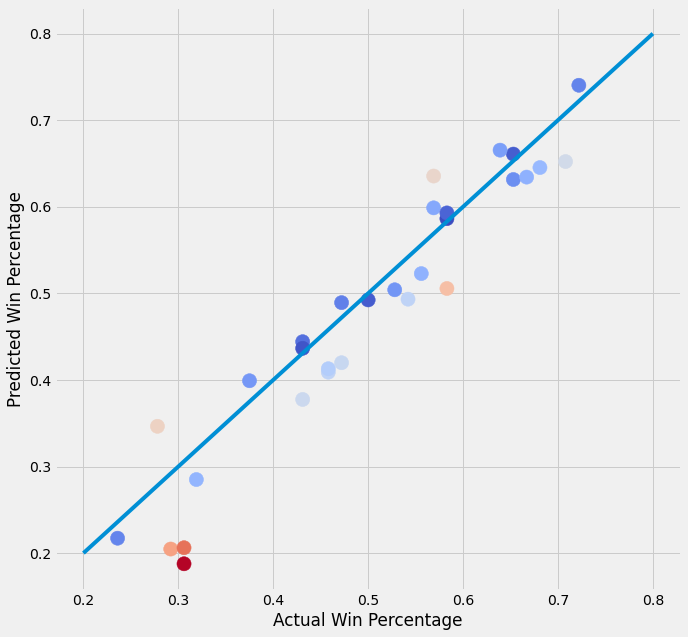

In [82]:
import matplotlib.style as style
plt.style.use('fivethirtyeight')
plt.scatter(predicted_wins['W_PCT'], predicted_wins['Predicted WIN PCT'], c = np.sqrt(predicted_wins["difference %"] ** 2),
            cmap="coolwarm", s=200)
plt.plot([0.2, 0.8], [0.2, 0.8])

plt.xlabel("Actual Win Percentage")
plt.ylabel("Predicted Win Percentage")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig('Traditional.png')